In [1]:
%matplotlib inline
import pandas as pd
import xarray as xr
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from numpy import sin,cos,pi
from windrose import WindroseAxes

In [2]:
df_sheet_index = pd.read_excel("E:\JU Class\PROJECT\MAIN IMP FILES\AIR QUALITY DATA (2019-2022).xlsx", sheet_name="OCT'22")
print (df_sheet_index)

              From Date              To Date  PM2.5    PM10     NO    NO2  \
0      01-10-2022 00:00     02-10-2022 00:00  49.10   88.00   8.21  15.70   
1      02-10-2022 00:00     03-10-2022 00:00  27.45   49.09   8.50  14.16   
2      03-10-2022 00:00     04-10-2022 00:00  19.60   35.30   7.91  12.25   
3      04-10-2022 00:00     05-10-2022 00:00  13.50   26.00   8.20  10.58   
4      05-10-2022 00:00     06-10-2022 00:00  12.68   26.81   9.55  10.95   
5      06-10-2022 00:00     07-10-2022 00:00  11.41   21.22  10.81  11.03   
6      07-10-2022 00:00     08-10-2022 00:00  14.11   34.20  17.35  10.49   
7      08-10-2022 00:00     09-10-2022 00:00  19.54   42.72  15.85  11.45   
8      09-10-2022 00:00     10-10-2022 00:00  13.62   26.54   9.05  11.86   
9      10-10-2022 00:00     11-10-2022 00:00  15.03   21.72   7.45  11.87   
10     11-10-2022 00:00     12-10-2022 00:00  11.85   24.42   6.38  11.18   
11     12-10-2022 00:00     13-10-2022 00:00  10.70   27.74   8.54  10.62   

In [3]:
df_sheet_index.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,SO2,Ozone,RH,BP,WD,WS,AQI,Unnamed: 14
0,01-10-2022 00:00,02-10-2022 00:00,49.10,88.00,8.21,15.70,23.90,8.06,15.14,96.27,994.90,226.84,0.72,99.0,Satisfactory
1,02-10-2022 00:00,03-10-2022 00:00,27.45,49.09,8.50,14.16,22.61,6.84,11.36,96.37,992.49,190.26,0.47,58.0,Satisfactory
2,03-10-2022 00:00,04-10-2022 00:00,19.60,35.30,7.91,12.25,20.16,5.99,10.44,94.22,999.76,108.50,0.53,43.0,Good
3,04-10-2022 00:00,05-10-2022 00:00,13.50,26.00,8.20,10.58,18.77,5.94,10.03,92.00,1003.19,87.43,0.94,24.0,Good
4,05-10-2022 00:00,06-10-2022 00:00,12.68,26.81,9.55,10.95,20.50,5.79,9.95,91.66,1004.98,89.78,0.73,36.0,Good


In [4]:
df_sheet_index = df_sheet_index.drop(['AQI', 'Unnamed: 14'], axis=1)

In [5]:
df_sheet_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  31 non-null     object 
 1   To Date    31 non-null     object 
 2   PM2.5      31 non-null     float64
 3   PM10       31 non-null     float64
 4   NO         31 non-null     float64
 5   NO2        31 non-null     float64
 6   NOx        31 non-null     float64
 7   SO2        31 non-null     float64
 8   Ozone      31 non-null     float64
 9   RH         31 non-null     float64
 10  BP         31 non-null     float64
 11  WD         31 non-null     float64
 12  WS         31 non-null     float64
dtypes: float64(11), object(2)
memory usage: 3.3+ KB


In [6]:
df_sheet_index = df_sheet_index.drop(['From Date','To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2', 'Ozone', 'RH', 'BP'], axis=1)

In [7]:
df_sheet_index.head()

,WD,WS
0,226.84,0.72
1,190.26,0.47
2,108.50,0.53
3,87.43,0.94
4,89.78,0.73


<AxesSubplot:xlabel='ws_x', ylabel='ws_y'>

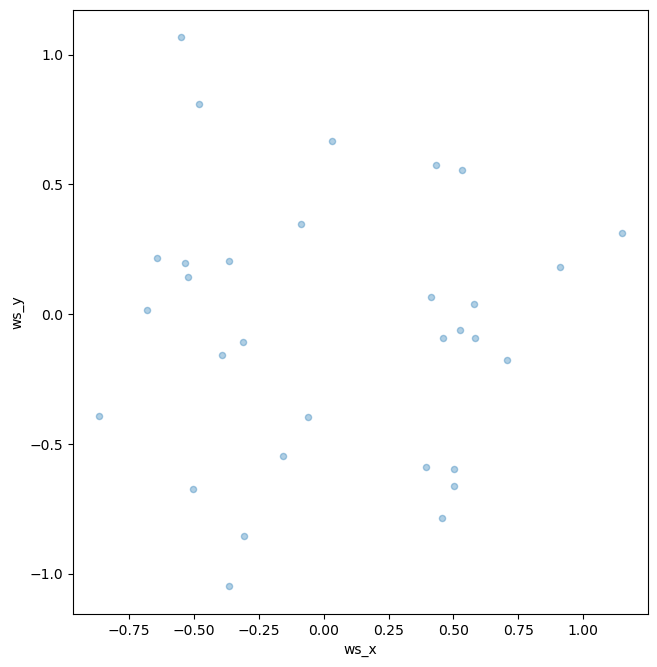

In [8]:
df_sheet_index['ws_x'] = df_sheet_index['WS'] * np.sin(df_sheet_index['WD'])
df_sheet_index['ws_y'] = df_sheet_index['WS'] * np.cos(df_sheet_index['WD'])
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df_sheet_index.plot(kind='scatter', x='ws_x', y='ws_y', alpha=0.35, ax=ax)

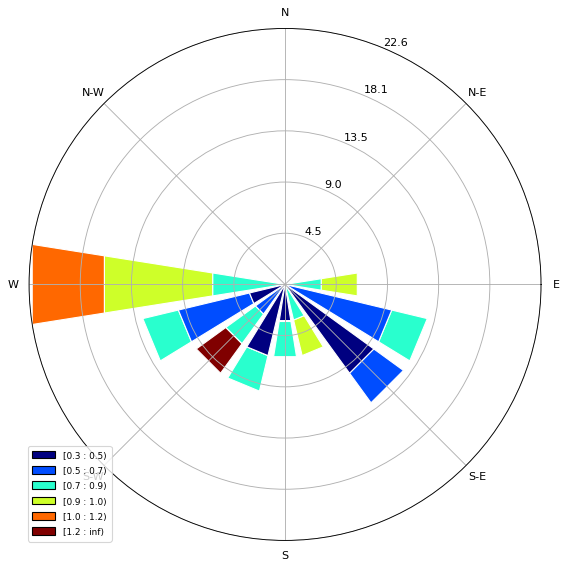

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(df_sheet_index.WD, df_sheet_index.WS, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

<AxesSubplot:>

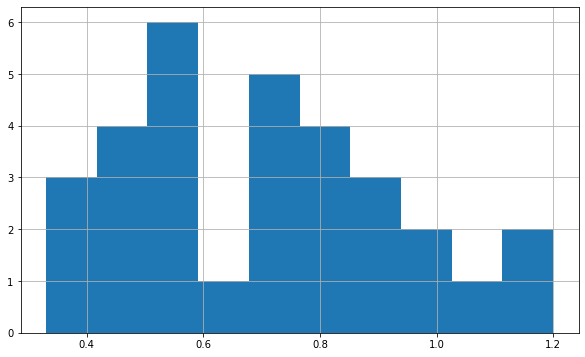

In [10]:
df_sheet_index['WS'].hist(figsize=(10,6))

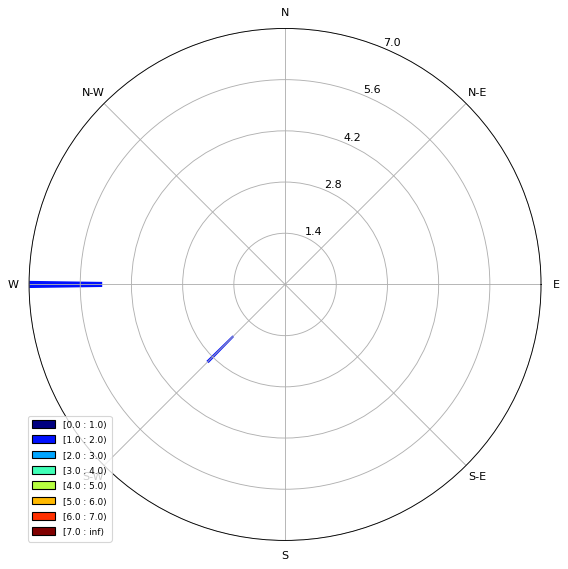

In [11]:
ax = WindroseAxes.from_ax()
ax.box(df_sheet_index.WD, df_sheet_index.WS, bins=np.arange(0,8,1))
ax.set_legend()

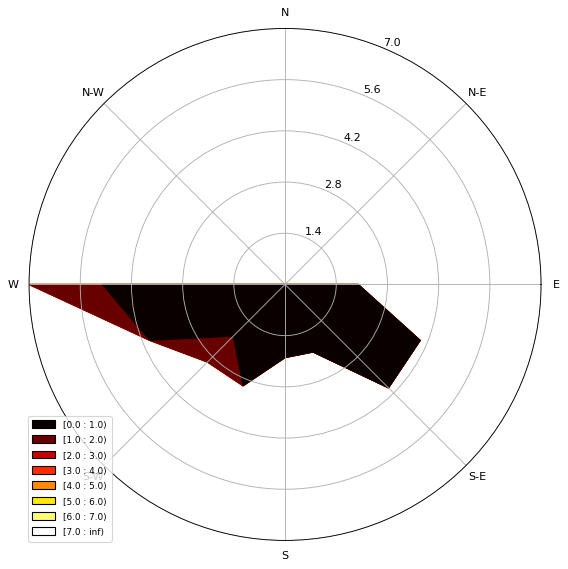

In [12]:
ax = WindroseAxes.from_ax()
ax.contourf(df_sheet_index.WD, df_sheet_index.WS, bins=np.arange(0,8,1), cmap=cm.hot)
ax.set_legend()